<h1>DESAFIO TÉCNICO - CIENTISTA DE DADOS JÚNIOR - AMERICANAS S.A.</h1>

<h2>PARTE 1 - ANÁLISE DOS DADOS</h2>

---

<h2>SUMÁRIO</h2>

* INTRODUÇÃO
* ANÁLISE EXPLORATÓRIA
* ANÁLISE UNIVARIADA
* ANÁLISE MULTIVARIADA

---

<h2>INTRODUÇÃO</h2>

Este teste consiste em desenvolver um modelo de aprendizado de máquina capaz de classificar as amostras do conjunto de dados **dataset_cdjr.parquet.gzip**. Disponível em: <https://drive.google.com/file/d/1HXq9mczY-5OpFaXK3kk8zAgFEgEgF3jt/view?usp=sharing>

É um conjunto de dados pequeno de **466 entradas**, composto inicialmente por **16 features** (feature0, feature1, …, feature 15) e uma coluna target, que é a classe. A coluna target é zero indicando a não ocorrência do evento que desejamos prever e um quando há ocorrência do evento que desejamos prever.

**ATIVIDADES**:<br/>
Nossa expectativa é a de observar a atuação nas seguintes tarefas:
* Análise exploratória dos dados
* Preparação dos dados
* Modelagem
* Avaliação da performance do modelo
* Entrega do modelo
<br/>
<br/>

**ENTREGA**<br/>
1. Crie um repositório em https://github.com/ e compartilhe conosco.
2. Documente as atividades mencionadas na seção anterior, através do README do repositório criado no item anterior.
3. Informe, também no README do repositório, como podemos executar/"rodar" a solução que você construiu.

> **Nota**: Sinta-se à vontade para incrementar a solução; por exemplo, criar um ambiente docker para a execução do ambiente.

---

In [1]:
#Importação dos pacotes para análises

import pandas as pd
import numpy as np

#Bibliotecas para visualizações de gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

import warnings
# Bibliotecas para computação estatística
from scipy import stats

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/dataset.csv')

<h2>ANÁLISE EXPLORATÓRIA</h2>

In [3]:
df.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
0,200.0,2,662.28,39.10,-188.55,0.246978,761,0.004548,3.523703,167326,33441.06,0.019804,26.850,0.009198,94.611429,7,0
1,150.0,2,0.00,149.55,-0.45,0.150000,3,0.037975,0.000000,79,78.93,0.000000,0.000,0.000000,0.000000,0,1
2,50.0,1,346.08,30.41,-102.10,2.430952,42,0.004239,3.389618,9907,18858.77,0.018351,25.525,0.095238,86.520000,4,0
3,100.0,2,0.00,43.84,-56.16,0.150968,372,0.005854,0.000000,63544,1164.11,0.000000,0.000,0.000000,0.000000,0,1
4,50.0,1,87.56,-3.05,-94.50,0.412664,229,0.004572,0.926561,50089,1786.26,0.049019,94.500,0.004367,87.560000,1,0


In [4]:
df.shape

(466, 17)

In [5]:
df.dtypes

feature0     float64
feature1       int64
feature2     float64
feature3     float64
feature4     float64
feature5     float64
feature6       int64
feature7     float64
feature8     float64
feature9       int64
feature10    float64
feature11    float64
feature12    float64
feature13    float64
feature14    float64
feature15      int64
target         int64
dtype: object

In [6]:
df.isnull().sum()

feature0     0
feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
target       0
dtype: int64

In [7]:
df.describe()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,4.660000e+02,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,438.743562,4.847639,1244.322468,44.600880,-434.299893,0.473991,979.070815,0.113885,3.857010,2.164378e+05,6930.456438,0.437333,61.886190,0.008634,87.713360,10.313305,0.557940
std,984.593065,6.836679,3558.699033,122.093515,975.555198,0.452261,1460.738442,1.873746,15.609132,3.508622e+05,17581.800818,3.442094,142.521523,0.017866,145.426437,33.625204,0.497165
min,0.000000,0.000000,0.000000,-645.870000,-15506.350000,0.150000,1.000000,0.000663,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,1.000000,0.000000,-0.400000,-492.035000,0.173669,133.500000,0.003318,0.000000,2.113100e+04,383.687500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,150.000000,2.000000,169.830000,18.360000,-154.525000,0.303854,420.000000,0.005127,0.937082,8.532850e+04,1410.855000,0.082515,19.692568,0.003207,72.524286,2.000000,1.000000
75%,500.000000,6.000000,1017.375000,44.630000,-50.180000,0.569848,1238.750000,0.009699,2.815824,2.645035e+05,5212.977500,0.311311,65.498098,0.009515,127.301505,8.000000,1.000000
max,15400.000000,31.000000,40291.240000,1521.900000,-0.260000,3.150000,11731.000000,40.000000,281.666667,3.366472e+06,237182.780000,73.080634,2232.100000,0.204611,2154.000000,541.000000,1.000000


**Considerações**:

* O dataset possui 466 registros;
* Pelo describe fica nítido que temos outliers que estão bem distante dos demais dados em todos os atributos;
* Outro indício de que os outliers estão influenciando fortemente os dados é que a média e a mediana da maioria dos atributos não possuem valores próximos. 

---
<h2>ANÁLISE UNIVARIADA</h2>

Irei começar por uma análise univariada dos dados. O primeiro atributo a ser estudado será o atributo target. Vejamos como ele se comporta.

**target**

In [19]:
df_target = df.copy()

#Proporção de colaboradores que deixaram a empresa
df_target = pd.DataFrame(df_target.groupby(['target'])['target'].count())
df_target['percent'] = df_target['target'].apply(lambda x: round(x / np.sum(df_target['target']) * 100, 2))
df_target

,target,percent
target,,
0,206,44.21
1,260,55.79


In [20]:
fig = px.pie(df_target, values='target', names=['Não', 'Sim'], title='Proporção de ocorrência do evento')

fig.update_layout(
    autosize=False,
    width=600,
    height=400
)

fig.show()

In [28]:
np.abs(df.corr()['target']).sort_values(ascending=False)

target       1.000000
feature1     0.176769
feature6     0.143432
feature2     0.135716
feature10    0.129679
feature13    0.121972
feature14    0.120456
feature0     0.115079
feature5     0.109589
feature9     0.106401
feature4     0.106070
feature15    0.090494
feature8     0.080155
feature3     0.070966
feature7     0.062497
feature12    0.056962
feature11    0.053771
Name: target, dtype: float64

In [18]:
del df_target

**Considerações**

* Cerca de 56% dos dados indicam que o evento ocorre [1], e o restante 44% indicam a não ocorrência do evento [0];
* Pode se dizer que os dados estão balanceados, portanto, provavelmente não precisaremos fazer algum trabalho de balanceamento dos dados;
* O atributo target tem baixa correlação com os demais atributos, o que dificultará na construção de um modelo preditivo muito assertivo;
    * A presença de outliers provavelmente está impactando nessa correlação;

---

Como os dados não possuem um contexto, eu decidi criar uma função que irei aplicar para todos os atributos com o intuito de fazer uma análise estatística geral. 

In [29]:
def analiseEstatisticaUnivariada(df, coluna):
    #Descrição estatística resumida dos dados 
    print('Descrição dos dados')
    display(df_feature[coluna].describe())

    #Exibição de assimetria e do gráfico histograma
    print('Skewness: {}'.format(df_feature[coluna].skew()))
    plt.figure(figsize=(8,4))
    sns.histplot(df_feature[coluna], kde=True, bins=40)
    plt.show()

    #Boxplot para exibir os outliers
    fig  = px.box(y=df_feature[coluna], width=400, height=600, title=f'Boxplot coluna {coluna}')
    fig.show()

    #Exibição da matriz de correlação do atributo com os demais
    display(df_feature.corr()[coluna].sort_values())

Irei realizar também o teste z-score para identificar os outliers para cada atributo individualmente.

In [30]:
def testeZScore(df, coluna, threshold = 3):
    #Cálculo do Z-score
    z = np.abs(stats.zscore(df[coluna]))

    #Selecionando somente os valores acima do threshold
    indices = list(np.array(np.where(z > threshold)).reshape(-1))

    #Visualizando os outliers
    df_res = df.iloc[indices]

    return df_res, indices

lista_indices_outliers = []

**Explicação das intepretações das análises**:
* Simetria ou Assimetria no histograma: O histograma indica se os dados estão normalmente distribuidos, quanto mais simétrico e mais concentrado no centro do gráfico, maior a probabilidade dos dados estarem normalmente distribuídos.
    * Para confirmar matematicamente isso, faremos o calculo do Skewness. Quanto mais próximo de zero, mais normalmente distribuídos os dados estão;
    * O que isso impacta?
        * Caso os dados não estejam normalmente distribuídos, aplicar estatística Gaussiana não seria muito eficaz;
        * Além disso, temos que saber qual a situação dos dados para escolher qual algoritmo utilizar na construção do modelo preditivo. Caso os dados não estejam normalmente distribuídos se torna inviável de aplicar modelos linearmente generálizeis;

* O boxplot vai mostrar por IQR (Amplitude interquartil) quais são os dados considerados outliers para cada atributo.

* Também quero visualizar a correlação entre cada atributo;

**feature0**

Descrição dos dados


count      466.000000
mean       438.743562
std        984.593065
min          0.000000
25%         50.000000
50%        150.000000
75%        500.000000
max      15400.000000
Name: feature0, dtype: float64

Skewness: 9.493693999809953


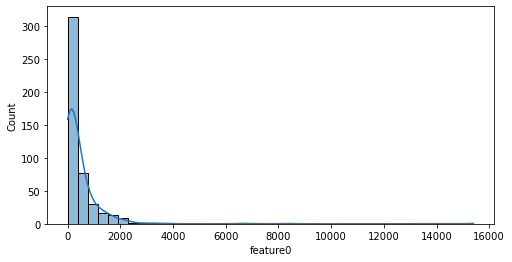

feature4    -0.992029
target      -0.115079
feature7    -0.025410
feature8    -0.020315
feature11    0.097989
feature13    0.121364
feature12    0.137433
feature5     0.183311
feature3     0.198977
feature14    0.204741
feature10    0.452541
feature1     0.578231
feature9     0.610831
feature6     0.774646
feature2     0.789706
feature15    0.860868
feature0     1.000000
Name: feature0, dtype: float64

In [31]:
df_feature = df.copy()
analiseEstatisticaUnivariada(df_feature, 'feature0')

In [32]:
df_zscore, indicesF0 = testeZScore(df_feature, 'feature0', threshold=3)
display(df_zscore)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
127,6600.0,22,39673.40,18.32,-6533.76,0.575299,10997,0.004756,6.270928,2312422,237182.78,0.167269,46.518824,0.012367,291.716176,136,0
227,3680.0,10,4306.46,1521.90,-2647.90,0.396910,6457,0.008391,1.680340,769477,40541.60,0.106223,54.528723,0.007279,91.626809,47,0
418,8240.0,23,19078.48,273.46,-7966.54,0.796408,9984,0.016259,2.399404,614062,42595.56,0.447898,28.601942,0.027845,68.627626,278,0
429,15400.0,25,40291.24,138.83,-15506.35,1.307438,11731,0.006809,2.626967,1722754,34780.93,1.158429,28.350370,0.046117,74.475490,541,1


In [33]:
del df_feature

**Considerações**:
* Os dados estão bem assimétricos, skewness de mais de 9 pontos;
* Vários outliers, sendo que há um deles que está muito distante dos demais;
* Desvio padrão (STD) é de mai de 900;
* O atributo possui correlação muito forte com os atributos: `feature4`, `feature0`;
* Pela pontuação z-score podemos ver que os dados a partir de 6600 são considerados outliers;

---

**feature1**

Descrição dos dados


count    466.000000
mean       4.847639
std        6.836679
min        0.000000
25%        1.000000
50%        2.000000
75%        6.000000
max       31.000000
Name: feature1, dtype: float64

Skewness: 2.205723213798659


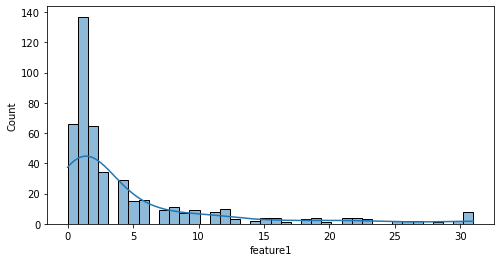

feature4    -0.583406
target      -0.176769
feature3    -0.076819
feature8    -0.043260
feature7    -0.040651
feature13    0.059067
feature11    0.083523
feature5     0.177083
feature12    0.233305
feature14    0.292515
feature10    0.399257
feature15    0.406480
feature2     0.444309
feature0     0.578231
feature6     0.662409
feature9     0.677923
feature1     1.000000
Name: feature1, dtype: float64

In [38]:
df_feature = df.copy()
analiseEstatisticaUnivariada(df_feature, 'feature1')

In [39]:
df_zscore, indicesF1 = testeZScore(df_feature, 'feature1', threshold=3)
display(df_zscore)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
38,2400.0,30,6840.91,-74.96,-2421.00,0.833096,2810,0.002952,2.922217,951772,98454.00,0.069483,43.351852,0.019217,126.683519,54,1
57,1550.0,31,3962.49,27.65,-1547.00,1.000000,1497,0.000980,2.646954,1526891,3826.69,1.035488,136.090909,0.007348,360.226364,11,0
59,1550.0,31,10685.14,-8.50,-1556.15,0.629264,2392,0.005940,7.098817,402698,15175.61,0.704100,22.135294,0.028428,157.134412,68,1
76,1300.0,26,2757.65,0.88,-1318.95,0.784846,1653,0.006708,2.125602,246440,42129.62,0.065456,51.894000,0.015124,110.306000,25,0
87,1300.0,26,1517.19,-8.86,-1344.10,0.347342,3725,0.004849,1.172617,768131,299.46,5.066420,143.761111,0.002416,168.576667,9,1
89,3225.0,30,9913.42,75.22,-3186.79,0.755033,4121,0.002739,3.186068,1504656,62793.92,0.157872,50.185323,0.015045,159.893871,62,0
141,1550.0,31,1942.15,15.10,-1557.45,0.472984,3187,0.002098,1.288411,1519358,9924.27,0.195697,65.539130,0.007217,84.441304,23,0
190,1550.0,31,1602.78,-14.22,-1575.19,0.706088,2160,0.002280,1.050900,947513,6865.87,0.233442,138.650000,0.005093,145.707273,11,0
199,1400.0,28,11470.79,-6.90,-1393.95,0.453681,3056,0.006965,8.273497,438769,34726.24,0.330321,19.527465,0.023233,161.560423,71,0
353,2050.0,31,6870.94,-75.48,-2054.15,0.192194,10167,0.005831,3.516274,1743642,32988.65,0.208282,23.262381,0.008262,81.796905,84,0


In [40]:
del df_feature

**Considerações**:
* Os dados estão bem assimétricos, skewness de mais de 2 pontos;
* Os dados são discretos;
* Vários outliers, a partir de 14;
* Desvio padrão (STD) é de 6.8, considerando que a mediana é igual a 2, é um valor alto;
* O atributo possui correlação razoável com os atributos: `feature6`, `feature9`;
* Pela pontuação z-score podemos ver que os dados a partir de 26 são considerados outliers;

---

**feature2**

Descrição dos dados


count      466.000000
mean      1244.322468
std       3558.699033
min          0.000000
25%          0.000000
50%        169.830000
75%       1017.375000
max      40291.240000
Name: feature2, dtype: float64

Skewness: 6.999722064871783


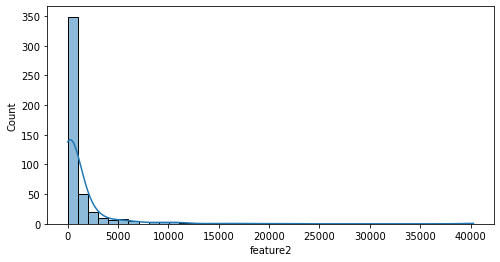

feature4    -0.800813
target      -0.135716
feature12   -0.019028
feature7    -0.018119
feature5     0.048085
feature3     0.108691
feature8     0.132372
feature14    0.214562
feature11    0.222864
feature13    0.340084
feature1     0.444309
feature9     0.491464
feature10    0.670302
feature6     0.709912
feature0     0.789706
feature15    0.869099
feature2     1.000000
Name: feature2, dtype: float64

In [41]:
df_feature = df.copy()
analiseEstatisticaUnivariada(df_feature, 'feature2')

In [42]:
df_zscore, indicesF2 = testeZScore(df_feature, 'feature2', threshold=3)
display(df_zscore)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
127,6600.0,22,39673.40,18.32,-6533.76,0.575299,10997,0.004756,6.270928,2312422,237182.78,0.167269,46.518824,0.012367,291.716176,136,0
198,1000.0,1,22028.16,173.30,-1809.85,0.328871,5386,0.005651,12.436154,953156,41443.09,0.531528,15.011017,0.021909,186.679322,118,0
309,2010.0,14,16513.30,25.60,-1984.40,0.578037,3433,0.007794,8.321558,440480,225.96,73.080634,21.110638,0.027381,175.673404,94,1
417,1350.0,21,14895.47,33.85,-1316.15,0.489457,2689,0.007039,11.317456,382032,84501.86,0.176274,9.139931,0.053552,103.440764,144,0
418,8240.0,23,19078.48,273.46,-7966.54,0.796408,9984,0.016259,2.399404,614062,42595.56,0.447898,28.601942,0.027845,68.627626,278,0
429,15400.0,25,40291.24,138.83,-15506.35,1.307438,11731,0.006809,2.626967,1722754,34780.93,1.158429,28.350370,0.046117,74.475490,541,1
461,1300.0,7,12133.73,244.30,-1081.90,0.395307,2642,0.008152,11.617895,324081,17343.28,0.699621,12.893827,0.030659,149.799136,81,0


In [43]:
del df_feature

**Considerações**:
* Os dados estão bem assimétricos, skewness de mais de 6.9 pontos;
* Os dados são contínuos;
* Vários outliers, a amplitude deste atributo é bastante grande;
* Desvio padrão (STD) é de 3550, considerando que a mediana é igual a 169, é um valor alto;
* O atributo possui correlação forte com os atributos: `feature4`, `feature15`;

---
 
**feature3**

Descrição dos dados


count     466.000000
mean       44.600880
std       122.093515
min      -645.870000
25%        -0.400000
50%        18.360000
75%        44.630000
max      1521.900000
Name: feature3, dtype: float64

Skewness: 4.69091869815087


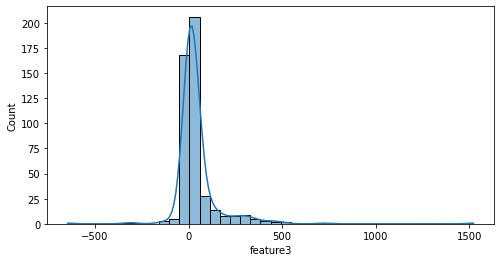

feature4    -0.128933
feature12   -0.083768
feature1    -0.076819
target      -0.070966
feature5    -0.066175
feature11   -0.006780
feature7    -0.004396
feature14   -0.000804
feature8     0.045513
feature9     0.058322
feature10    0.068300
feature13    0.070714
feature2     0.108691
feature15    0.123163
feature6     0.179833
feature0     0.198977
feature3     1.000000
Name: feature3, dtype: float64

In [44]:
df_feature = df.copy()
analiseEstatisticaUnivariada(df_feature, 'feature3')

In [45]:
df_zscore, indicesF3 = testeZScore(df_feature, 'feature3', threshold=3)
display(df_zscore)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
158,1600.0,2,880.39,505.80,-1084.10,1.148411,944,0.003384,0.812093,278970,21790.87,0.040402,180.683333,0.006356,146.731667,6,0
173,150.0,3,472.41,-329.60,-148.80,0.222535,639,0.028762,3.322152,22217,2403.62,0.196541,23.700000,0.009390,78.735000,6,0
227,3680.0,10,4306.46,1521.90,-2647.90,0.396910,6457,0.008391,1.680340,769477,40541.60,0.106223,54.528723,0.007279,91.626809,47,0
262,1300.0,2,5706.25,452.67,-1204.57,0.290143,3976,0.004771,4.946429,833372,49900.42,0.114353,30.358158,0.009557,150.164474,38,0
281,500.0,1,136.50,-645.87,-208.45,0.951826,219,0.006420,0.654833,34111,23587.71,0.005787,208.450000,0.004566,136.500000,1,0
282,2900.0,15,4959.54,723.99,-2180.09,0.351447,5986,0.004502,2.357465,1329659,16461.29,0.301285,56.858378,0.006181,134.041622,37,0
298,0.0,0,134.05,431.85,-95.55,0.150000,621,0.016021,1.439077,38761,568.65,0.235734,93.150000,0.001610,134.050000,1,0
307,500.0,2,1459.27,424.50,-75.50,0.250000,302,0.004819,19.328079,62675,8681.48,0.168090,6.863636,0.036424,132.660909,11,1
344,0.0,0,0.00,451.35,-1.20,0.300000,4,0.006814,0.000000,587,8984.43,0.000000,0.000000,0.000000,0.000000,0,1
434,500.0,1,0.00,499.60,-0.40,0.200000,2,0.001369,0.000000,1461,38.28,0.000000,0.000000,0.000000,0.000000,0,1


In [46]:
del df_feature

**Considerações**:
* Os dados estão bem assimétricos, skewness de mais de 4.6 pontos;
* Os dados são contínuos;
* Vários outliers, tanto para valores negativos quanto para valores positivos;
* Desvio padrão (STD) é de 122, também é um valor alto;
* O atributo não possui correlação forte nenhum outro;

---

**feature4**

Descrição dos dados


count      466.000000
mean      -434.299893
std        975.555198
min     -15506.350000
25%       -492.035000
50%       -154.525000
75%        -50.180000
max         -0.260000
Name: feature4, dtype: float64

Skewness: -9.749161818510983


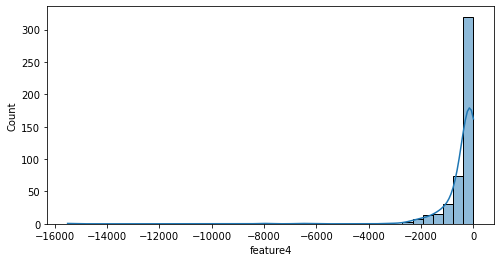

feature0    -0.992029
feature15   -0.867045
feature2    -0.800813
feature6    -0.776422
feature9    -0.618550
feature1    -0.583406
feature10   -0.452139
feature14   -0.216575
feature5    -0.185828
feature12   -0.156013
feature3    -0.128933
feature13   -0.115017
feature11   -0.099546
feature7     0.025066
feature8     0.026514
target       0.106070
feature4     1.000000
Name: feature4, dtype: float64

In [47]:
df_feature = df.copy()
analiseEstatisticaUnivariada(df_feature, 'feature4')

In [48]:
df_zscore, indicesF4 = testeZScore(df_feature, 'feature4', threshold=3)
display(df_zscore)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
127,6600.0,22,39673.40,18.32,-6533.76,0.575299,10997,0.004756,6.270928,2312422,237182.78,0.167269,46.518824,0.012367,291.716176,136,0
418,8240.0,23,19078.48,273.46,-7966.54,0.796408,9984,0.016259,2.399404,614062,42595.56,0.447898,28.601942,0.027845,68.627626,278,0
429,15400.0,25,40291.24,138.83,-15506.35,1.307438,11731,0.006809,2.626967,1722754,34780.93,1.158429,28.350370,0.046117,74.475490,541,1


In [49]:
del df_feature

**Considerações**:
* Os dados estão bem assimétricos, skewness de -9 pontos, ou seja, dessa vez os dados se concentram mais na cauda do histograma (à direita);
* Os dados são contínuos;
* Outliers a partir de -1200;
* Desvio padrão (STD) também está bastante eleveado;
* O atributo possui correlação forte com as `feature0`, `feature15` e `feature2`;

---

**feature5**

Descrição dos dados


count    466.000000
mean       0.473991
std        0.452261
min        0.150000
25%        0.173669
50%        0.303854
75%        0.569848
max        3.150000
Name: feature5, dtype: float64

Skewness: 2.582784874225408


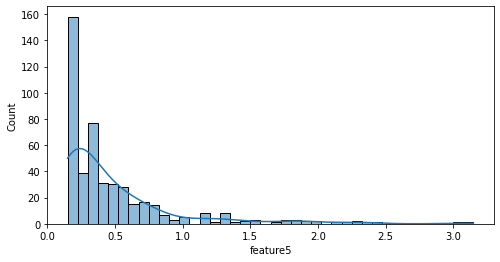

feature4    -0.185828
target      -0.109589
feature8    -0.087881
feature3    -0.066175
feature6    -0.058442
feature7    -0.041284
feature11   -0.005897
feature13   -0.002519
feature9     0.036884
feature2     0.048085
feature15    0.050334
feature14    0.085943
feature10    0.091967
feature1     0.177083
feature0     0.183311
feature12    0.185243
feature5     1.000000
Name: feature5, dtype: float64

In [50]:
df_feature = df.copy()
analiseEstatisticaUnivariada(df_feature, 'feature5')

In [51]:
df_zscore, indicesF5 = testeZScore(df_feature, 'feature5', threshold=3)
display(df_zscore)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
2,50.00,1,346.08,30.41,-102.10,2.430952,42,0.004239,3.389618,9907,18858.77,0.018351,25.525000,0.095238,86.520000,4,0
10,500.00,1,0.00,345.65,-154.35,3.150000,49,0.001869,0.000000,26213,0.00,0.000000,0.000000,0.000000,0.000000,0,1
18,250.00,5,89.90,-37.17,-255.76,1.853333,138,0.002234,0.351501,61784,656.30,0.136980,255.760000,0.007246,89.900000,1,0
70,0.00,0,0.00,-0.90,-187.55,2.259639,83,0.001982,0.000000,41880,0.00,0.000000,0.000000,0.000000,0.000000,0,1
103,150.00,1,0.00,0.00,-150.00,3.000000,50,0.003812,0.000000,13117,112.85,0.000000,0.000000,0.000000,0.000000,0,1
224,600.00,4,0.00,-6.28,-604.95,1.855675,326,0.001391,0.000000,234395,1148.55,0.000000,0.000000,0.000000,0.000000,0,0
314,1599.25,5,1537.75,8.28,-1643.47,1.904368,863,0.002699,0.935673,319699,41366.03,0.037174,164.347000,0.011587,153.775000,10,0
385,650.00,4,251.88,-7.79,-657.79,2.276090,289,0.002502,0.382919,115515,895.22,0.281361,219.263333,0.010381,83.960000,3,0
389,150.00,3,0.00,47.25,-102.75,2.140625,48,0.001497,0.000000,32068,375.00,0.000000,0.000000,0.000000,0.000000,0,0
401,950.00,19,402.07,-116.38,-1028.93,1.923051,508,0.001913,0.411573,265490,755.28,0.532346,244.227500,0.007874,100.517500,4,1


In [52]:
del df_feature

**Considerações**:
* Os dados estão bem assimétricos, skewness de 2.5 pontos;
* Os dados são contínuos;
* Vários outliers;
* Desvio padrão (STD) também está bastante eleveado;
* O atributo não possui correlação forte com nenhum outro;

---

**feature6**

Descrição dos dados


count      466.000000
mean       979.070815
std       1460.738442
min          1.000000
25%        133.500000
50%        420.000000
75%       1238.750000
max      11731.000000
Name: feature6, dtype: float64

Skewness: 3.601131187218982


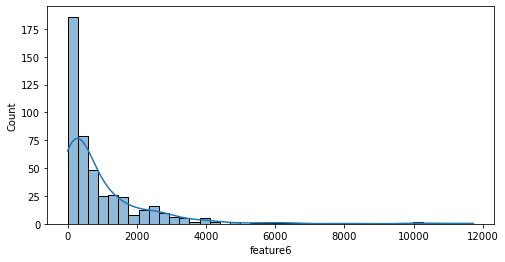

feature4    -0.776422
target      -0.143432
feature5    -0.058442
feature7    -0.036110
feature8    -0.021067
feature13    0.071417
feature11    0.120623
feature12    0.122642
feature3     0.179833
feature14    0.204314
feature10    0.452850
feature1     0.662409
feature15    0.688423
feature2     0.709912
feature9     0.772431
feature0     0.774646
feature6     1.000000
Name: feature6, dtype: float64

In [53]:
df_feature = df.copy()
analiseEstatisticaUnivariada(df_feature, 'feature6')

In [54]:
df_zscore, indicesF6 = testeZScore(df_feature, 'feature6', threshold=3)
display(df_zscore)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
127,6600.0,22,39673.40,18.32,-6533.76,0.575299,10997,0.004756,6.270928,2312422,237182.78,0.167269,46.518824,0.012367,291.716176,136,0
168,1359.0,10,1667.77,54.09,-1350.23,0.226547,5775,0.006203,1.274751,931066,3094.69,0.538913,109.025833,0.002078,138.980833,12,1
198,1000.0,1,22028.16,173.30,-1809.85,0.328871,5386,0.005651,12.436154,953156,41443.09,0.531528,15.011017,0.021909,186.679322,118,0
227,3680.0,10,4306.46,1521.90,-2647.90,0.396910,6457,0.008391,1.680340,769477,40541.60,0.106223,54.528723,0.007279,91.626809,47,0
254,1000.0,20,816.06,39.50,-961.05,0.150000,6249,0.010456,0.870603,597629,3674.29,0.222100,78.112500,0.001920,68.005000,12,1
282,2900.0,15,4959.54,723.99,-2180.09,0.351447,5986,0.004502,2.357465,1329659,16461.29,0.301285,56.858378,0.006181,134.041622,37,0
353,2050.0,31,6870.94,-75.48,-2054.15,0.192194,10167,0.005831,3.516274,1743642,32988.65,0.208282,23.262381,0.008262,81.796905,84,0
418,8240.0,23,19078.48,273.46,-7966.54,0.796408,9984,0.016259,2.399404,614062,42595.56,0.447898,28.601942,0.027845,68.627626,278,0
424,1250.0,25,1716.12,8.41,-1202.13,0.152053,7906,0.003749,1.427566,2108706,3664.18,0.468350,133.570000,0.001138,190.680000,9,0
429,15400.0,25,40291.24,138.83,-15506.35,1.307438,11731,0.006809,2.626967,1722754,34780.93,1.158429,28.350370,0.046117,74.475490,541,1


In [55]:
del df_feature

---

**feature7**

Descrição dos dados


count    466.000000
mean       0.113885
std        1.873746
min        0.000663
25%        0.003318
50%        0.005127
75%        0.009699
max       40.000000
Name: feature7, dtype: float64

Skewness: 20.903536954956426


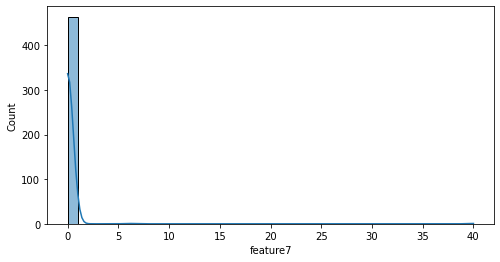

target      -0.062497
feature5    -0.041284
feature1    -0.040651
feature6    -0.036110
feature9    -0.036081
feature14   -0.032848
feature0    -0.025410
feature12   -0.025163
feature10   -0.020044
feature13   -0.020022
feature2    -0.018119
feature15   -0.016011
feature8    -0.009083
feature11   -0.007061
feature3    -0.004396
feature4     0.025066
feature7     1.000000
Name: feature7, dtype: float64

In [56]:
df_feature = df.copy()
analiseEstatisticaUnivariada(df_feature, 'feature7')

In [57]:
df_zscore, indicesF7 = testeZScore(df_feature, 'feature7', threshold=3)
display(df_zscore)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
169,0.0,0,0.0,38.75,-6.30,0.15,40,40.000000,0.0,1,116.19,0.0,0.0,0.0,0.0,0,0
290,0.0,0,0.0,-1.23,-8.25,0.15,55,6.111111,0.0,9,203.67,0.0,0.0,0.0,0.0,0,0


In [58]:
del df_feature

---

**feature8**

Descrição dos dados


count    466.000000
mean       3.857010
std       15.609132
min        0.000000
25%        0.000000
50%        0.937082
75%        2.815824
max      281.666667
Name: feature8, dtype: float64

Skewness: 13.371250995369087


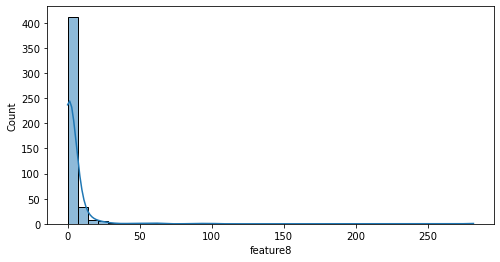

feature5    -0.087881
target      -0.080155
feature12   -0.068014
feature9    -0.054245
feature1    -0.043260
feature6    -0.021067
feature0    -0.020315
feature7    -0.009083
feature11    0.026461
feature4     0.026514
feature3     0.045513
feature10    0.087770
feature15    0.092604
feature2     0.132372
feature14    0.284515
feature13    0.681254
feature8     1.000000
Name: feature8, dtype: float64

In [59]:
df_feature = df.copy()
analiseEstatisticaUnivariada(df_feature, 'feature8')

In [60]:
df_zscore, indicesF8 = testeZScore(df_feature, 'feature8', threshold=3)
display(df_zscore)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
67,200.0,1,3058.64,197.60,-49.20,0.351429,140,0.309051,62.167480,453,5761.35,0.530889,3.280000,0.107143,203.909333,15,0
91,50.0,1,845.00,47.00,-3.00,0.300000,10,0.017762,281.666667,563,8429.39,0.100245,3.000000,0.100000,845.000000,1,0
228,100.0,1,4789.05,26.35,-94.80,0.150000,612,0.015076,52.168301,40594,7987.57,0.599563,1.700000,0.088235,88.686111,54,0
247,0.0,0,235.57,11.30,-2.65,0.155882,17,0.103030,88.894340,165,1476.29,0.159569,1.325000,0.117647,117.785000,2,1
318,140.0,2,10812.15,10.67,-184.00,0.250000,723,0.338167,59.818257,2138,81751.50,0.132256,2.177711,0.114799,130.266867,83,0
355,350.0,1,10294.09,245.90,-104.10,0.300000,347,0.090957,98.886551,3815,4607.32,2.234290,1.466197,0.204611,144.987183,71,0


In [61]:
del df_feature

---

**feature9**

Descrição dos dados


count    4.660000e+02
mean     2.164378e+05
std      3.508622e+05
min      1.000000e+00
25%      2.113100e+04
50%      8.532850e+04
75%      2.645035e+05
max      3.366472e+06
Name: feature9, dtype: float64

Skewness: 3.757792354608224


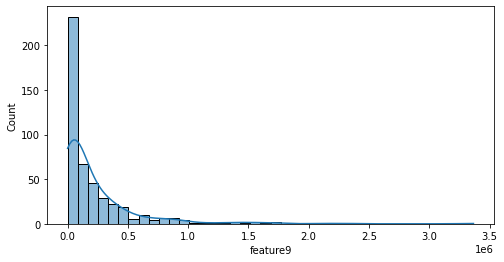

feature4    -0.618550
target      -0.106401
feature8    -0.054245
feature7    -0.036081
feature13   -0.009987
feature5     0.036884
feature3     0.058322
feature11    0.066881
feature14    0.304573
feature12    0.322274
feature10    0.359134
feature15    0.405209
feature2     0.491464
feature0     0.610831
feature1     0.677923
feature6     0.772431
feature9     1.000000
Name: feature9, dtype: float64

In [62]:
df_feature = df.copy()
analiseEstatisticaUnivariada(df_feature, 'feature9')

In [63]:
df_zscore, indicesF9 = testeZScore(df_feature, 'feature9', threshold=3)
display(df_zscore)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
57,1550.0,31,3962.49,27.65,-1547.00,1.000000,1497,0.000980,2.646954,1526891,3826.69,1.035488,136.090909,0.007348,360.226364,11,0
89,3225.0,30,9913.42,75.22,-3186.79,0.755033,4121,0.002739,3.186068,1504656,62793.92,0.157872,50.185323,0.015045,159.893871,62,0
127,6600.0,22,39673.40,18.32,-6533.76,0.575299,10997,0.004756,6.270928,2312422,237182.78,0.167269,46.518824,0.012367,291.716176,136,0
141,1550.0,31,1942.15,15.10,-1557.45,0.472984,3187,0.002098,1.288411,1519358,9924.27,0.195697,65.539130,0.007217,84.441304,23,0
250,1160.0,16,169.80,80.28,-1112.55,0.431221,2580,0.001854,0.152622,1391738,3188.38,0.053256,556.275000,0.000775,84.900000,2,0
253,2150.0,22,5375.28,-3.05,-2165.85,0.536376,3949,0.001173,2.537724,3366472,12479.81,0.430718,66.192188,0.008103,167.977500,32,0
268,2140.0,23,1935.69,16.22,-2160.87,0.566711,3813,0.002804,0.895792,1360081,6053.69,0.319754,83.110385,0.006819,74.449615,26,0
282,2900.0,15,4959.54,723.99,-2180.09,0.351447,5986,0.004502,2.357465,1329659,16461.29,0.301285,56.858378,0.006181,134.041622,37,0
353,2050.0,31,6870.94,-75.48,-2054.15,0.192194,10167,0.005831,3.516274,1743642,32988.65,0.208282,23.262381,0.008262,81.796905,84,0
390,2200.0,22,2154.00,-53.02,-2232.10,1.326263,1683,0.001022,0.965011,1646056,3392.88,0.634859,2232.100000,0.000594,2154.000000,1,0


In [64]:
del df_feature

---

**feature10**

Descrição dos dados


count       466.000000
mean       6930.456438
std       17581.800818
min           0.000000
25%         383.687500
50%        1410.855000
75%        5212.977500
max      237182.780000
Name: feature10, dtype: float64

Skewness: 6.910017542590957


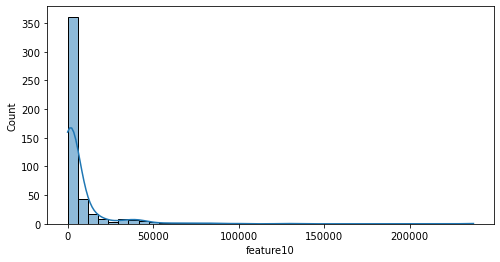

feature4    -0.452139
target      -0.129679
feature11   -0.029757
feature7    -0.020044
feature12   -0.013883
feature3     0.068300
feature8     0.087770
feature5     0.091967
feature14    0.188095
feature13    0.233881
feature9     0.359134
feature1     0.399257
feature15    0.422467
feature0     0.452541
feature6     0.452850
feature2     0.670302
feature10    1.000000
Name: feature10, dtype: float64

In [65]:
df_feature = df.copy()
analiseEstatisticaUnivariada(df_feature, 'feature10')

In [66]:
df_zscore, indicesF10 = testeZScore(df_feature, 'feature10', threshold=3)
display(df_zscore)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
16,750.0,15,5565.90,11.65,-770.00,0.500000,1495,0.011422,7.446020,130892,67852.96,0.082029,41.527778,0.012040,309.216667,18,1
38,2400.0,30,6840.91,-74.96,-2421.00,0.833096,2810,0.002952,2.922217,951772,98454.00,0.069483,43.351852,0.019217,126.683519,54,1
89,3225.0,30,9913.42,75.22,-3186.79,0.755033,4121,0.002739,3.186068,1504656,62793.92,0.157872,50.185323,0.015045,159.893871,62,0
127,6600.0,22,39673.40,18.32,-6533.76,0.575299,10997,0.004756,6.270928,2312422,237182.78,0.167269,46.518824,0.012367,291.716176,136,0
313,1100.0,22,8314.20,6.07,-1097.73,0.703498,1495,0.004020,7.905261,371927,128238.12,0.064834,32.866563,0.021405,259.818750,32,1
318,140.0,2,10812.15,10.67,-184.00,0.250000,723,0.338167,59.818257,2138,81751.50,0.132256,2.177711,0.114799,130.266867,83,0
374,790.0,6,3460.95,36.09,-791.20,0.578363,1368,0.003141,4.374305,435512,75394.59,0.045904,29.303704,0.019737,128.183333,27,1
417,1350.0,21,14895.47,33.85,-1316.15,0.489457,2689,0.007039,11.317456,382032,84501.86,0.176274,9.139931,0.053552,103.440764,144,0


In [67]:
del df_feature

---

**feature11**

Descrição dos dados


count    466.000000
mean       0.437333
std        3.442094
min        0.000000
25%        0.000000
50%        0.082515
75%        0.311311
max       73.080634
Name: feature11, dtype: float64

Skewness: 20.349340523819112


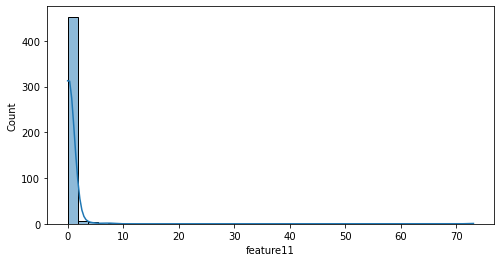

feature4    -0.099546
feature10   -0.029757
feature7    -0.007061
feature3    -0.006780
feature5    -0.005897
feature12    0.003482
feature8     0.026461
target       0.053771
feature14    0.063549
feature9     0.066881
feature13    0.074250
feature1     0.083523
feature0     0.097989
feature6     0.120623
feature15    0.141147
feature2     0.222864
feature11    1.000000
Name: feature11, dtype: float64

In [68]:
df_feature = df.copy()
analiseEstatisticaUnivariada(df_feature, 'feature11')

In [69]:
df_zscore, indicesF11 = testeZScore(df_feature, 'feature11', threshold=3)
display(df_zscore)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
309,2010.0,14,16513.3,25.6,-1984.4,0.578037,3433,0.007794,8.321558,440480,225.96,73.080634,21.110638,0.027381,175.673404,94,1


In [70]:
del df_feature

---

**feature12**

Descrição dos dados


count     466.000000
mean       61.886190
std       142.521523
min         0.000000
25%         0.000000
50%        19.692568
75%        65.498098
max      2232.100000
Name: feature12, dtype: float64

Skewness: 8.667886527172588


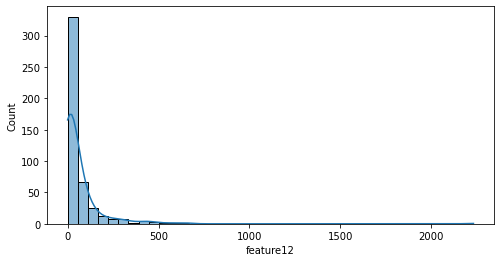

feature4    -0.156013
feature13   -0.097302
feature3    -0.083768
feature8    -0.068014
target      -0.056962
feature15   -0.051942
feature7    -0.025163
feature2    -0.019028
feature10   -0.013883
feature11    0.003482
feature6     0.122642
feature0     0.137433
feature5     0.185243
feature1     0.233305
feature9     0.322274
feature14    0.680985
feature12    1.000000
Name: feature12, dtype: float64

In [71]:
df_feature = df.copy()
analiseEstatisticaUnivariada(df_feature, 'feature12')

In [72]:
df_zscore, indicesF12 = testeZScore(df_feature, 'feature12', threshold=3)
display(df_zscore)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
56,635.09,5,346.79,-6.360000e+00,-641.45,1.827493,351,0.001689,0.540634,207840,567.59,0.610987,641.450,0.002849,346.79,1,0
122,650.00,4,84.89,-3.850000e+00,-653.85,0.297610,2197,0.003726,0.129831,589689,0.00,0.000000,653.850,0.000455,84.89,1,1
181,100.00,2,119.94,2.309264e-14,-600.00,0.483683,1238,0.003310,0.200301,373981,821.60,0.145983,598.800,0.000808,119.94,1,1
239,50.00,1,109.99,-5.500000e-01,-516.00,0.800000,645,0.002386,0.213159,270348,335.97,0.327380,516.000,0.001550,109.99,1,0
250,1160.00,16,169.80,8.028000e+01,-1112.55,0.431221,2580,0.001854,0.152622,1391738,3188.38,0.053256,556.275,0.000775,84.90,2,0
390,2200.00,22,2154.00,-5.302000e+01,-2232.10,1.326263,1683,0.001022,0.965011,1646056,3392.88,0.634859,2232.100,0.000594,2154.00,1,0


In [73]:
del df_feature

---

**feature13**

Descrição dos dados


count    466.000000
mean       0.008634
std        0.017866
min        0.000000
25%        0.000000
50%        0.003207
75%        0.009515
max        0.204611
Name: feature13, dtype: float64

Skewness: 5.414284196822012


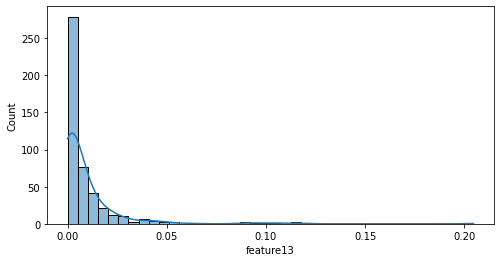

target      -0.121972
feature4    -0.115017
feature12   -0.097302
feature7    -0.020022
feature9    -0.009987
feature5    -0.002519
feature1     0.059067
feature3     0.070714
feature6     0.071417
feature11    0.074250
feature0     0.121364
feature14    0.174262
feature10    0.233881
feature15    0.327952
feature2     0.340084
feature8     0.681254
feature13    1.000000
Name: feature13, dtype: float64

In [74]:
df_feature = df.copy()
analiseEstatisticaUnivariada(df_feature, 'feature13')

In [75]:
df_zscore, indicesF13 = testeZScore(df_feature, 'feature13', threshold=3)
display(df_zscore)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
2,50.0,1,346.08,30.41,-102.10,2.430952,42,0.004239,3.389618,9907,18858.77,0.018351,25.525000,0.095238,86.520000,4,0
67,200.0,1,3058.64,197.60,-49.20,0.351429,140,0.309051,62.167480,453,5761.35,0.530889,3.280000,0.107143,203.909333,15,0
91,50.0,1,845.00,47.00,-3.00,0.300000,10,0.017762,281.666667,563,8429.39,0.100245,3.000000,0.100000,845.000000,1,0
228,100.0,1,4789.05,26.35,-94.80,0.150000,612,0.015076,52.168301,40594,7987.57,0.599563,1.700000,0.088235,88.686111,54,0
247,0.0,0,235.57,11.30,-2.65,0.155882,17,0.103030,88.894340,165,1476.29,0.159569,1.325000,0.117647,117.785000,2,1
318,140.0,2,10812.15,10.67,-184.00,0.250000,723,0.338167,59.818257,2138,81751.50,0.132256,2.177711,0.114799,130.266867,83,0
355,350.0,1,10294.09,245.90,-104.10,0.300000,347,0.090957,98.886551,3815,4607.32,2.234290,1.466197,0.204611,144.987183,71,0
372,50.0,1,35.31,48.35,-1.65,0.150000,11,0.029024,21.400000,379,6169.79,0.005723,1.650000,0.090909,35.310000,1,1
432,50.0,1,748.18,3.50,-46.50,0.415315,111,0.010505,16.229501,10566,4715.44,0.158666,6.585714,0.063063,106.882857,7,1


In [76]:
del df_feature

---

**feature14**

Descrição dos dados


count     466.000000
mean       87.713360
std       145.426437
min         0.000000
25%         0.000000
50%        72.524286
75%       127.301505
max      2154.000000
Name: feature14, dtype: float64

Skewness: 7.948637197045503


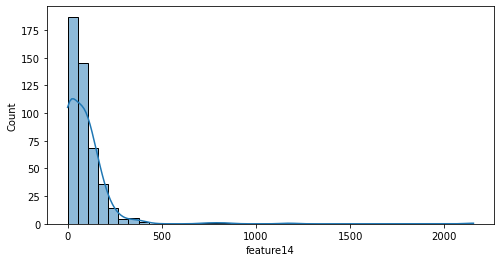

feature4    -0.216575
target      -0.120456
feature7    -0.032848
feature3    -0.000804
feature11    0.063549
feature15    0.069619
feature5     0.085943
feature13    0.174262
feature10    0.188095
feature6     0.204314
feature0     0.204741
feature2     0.214562
feature8     0.284515
feature1     0.292515
feature9     0.304573
feature12    0.680985
feature14    1.000000
Name: feature14, dtype: float64

In [77]:
df_feature = df.copy()
analiseEstatisticaUnivariada(df_feature, 'feature14')

In [78]:
df_zscore, indicesF14 = testeZScore(df_feature, 'feature14', threshold=3)
display(df_zscore)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
78,1000.0,10,5540.60,-5.20,-1026.50,0.563517,1757,0.009630,5.596000,182460,19149.73,0.289330,141.442857,0.003984,791.514286,7,0
84,2100.0,18,5875.10,144.00,-2444.00,1.000000,2367,0.016903,2.482087,140034,34511.20,0.170237,473.400000,0.002112,1175.020000,5,0
91,50.0,1,845.00,47.00,-3.00,0.300000,10,0.017762,281.666667,563,8429.39,0.100245,3.000000,0.100000,845.000000,1,0
267,350.0,1,1468.56,281.95,-87.75,0.750000,117,0.003275,16.735726,35720,5340.87,0.274966,43.875000,0.017094,734.280000,2,1
390,2200.0,22,2154.00,-53.02,-2232.10,1.326263,1683,0.001022,0.965011,1646056,3392.88,0.634859,2232.100000,0.000594,2154.000000,1,0


In [79]:
del df_feature

---

**feature15**

Descrição dos dados


count    466.000000
mean      10.313305
std       33.625204
min        0.000000
25%        0.000000
50%        2.000000
75%        8.000000
max      541.000000
Name: feature15, dtype: float64

Skewness: 10.3157367811891


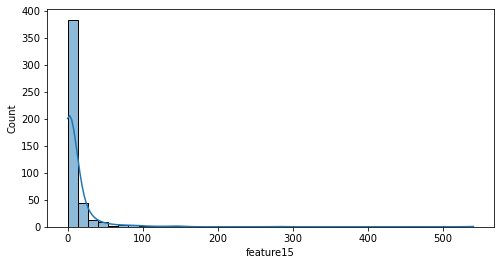

feature4    -0.867045
target      -0.090494
feature12   -0.051942
feature7    -0.016011
feature5     0.050334
feature14    0.069619
feature8     0.092604
feature3     0.123163
feature11    0.141147
feature13    0.327952
feature9     0.405209
feature1     0.406480
feature10    0.422467
feature6     0.688423
feature0     0.860868
feature2     0.869099
feature15    1.000000
Name: feature15, dtype: float64

In [80]:
df_feature = df.copy()
analiseEstatisticaUnivariada(df_feature, 'feature15')

In [81]:
df_zscore, indicesF15 = testeZScore(df_feature, 'feature15', threshold=3)
display(df_zscore)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
37,850.0,6,8452.73,97.90,-785.60,0.200000,3928,0.005665,10.759585,693325,3502.77,2.413156,5.134641,0.038951,55.246601,153,1
127,6600.0,22,39673.40,18.32,-6533.76,0.575299,10997,0.004756,6.270928,2312422,237182.78,0.167269,46.518824,0.012367,291.716176,136,0
198,1000.0,1,22028.16,173.30,-1809.85,0.328871,5386,0.005651,12.436154,953156,41443.09,0.531528,15.011017,0.021909,186.679322,118,0
417,1350.0,21,14895.47,33.85,-1316.15,0.489457,2689,0.007039,11.317456,382032,84501.86,0.176274,9.139931,0.053552,103.440764,144,0
418,8240.0,23,19078.48,273.46,-7966.54,0.796408,9984,0.016259,2.399404,614062,42595.56,0.447898,28.601942,0.027845,68.627626,278,0
429,15400.0,25,40291.24,138.83,-15506.35,1.307438,11731,0.006809,2.626967,1722754,34780.93,1.158429,28.350370,0.046117,74.475490,541,1


In [82]:
del df_feature

<h3>Considerações da Análise Univariada</h3>

* Todos os atributos estão assimétricos, com Skewness bastante elevado;
* O desvio-padrão também está elevado em todos os atributos;
* O principal fator que está atrapalhando este dataset são os outliers, no próximo notebook irei aplicar várias técnicas para minimizar esse problema;

<h2>ANÁLISE MULTIVARIADA</h2>

<AxesSubplot:>

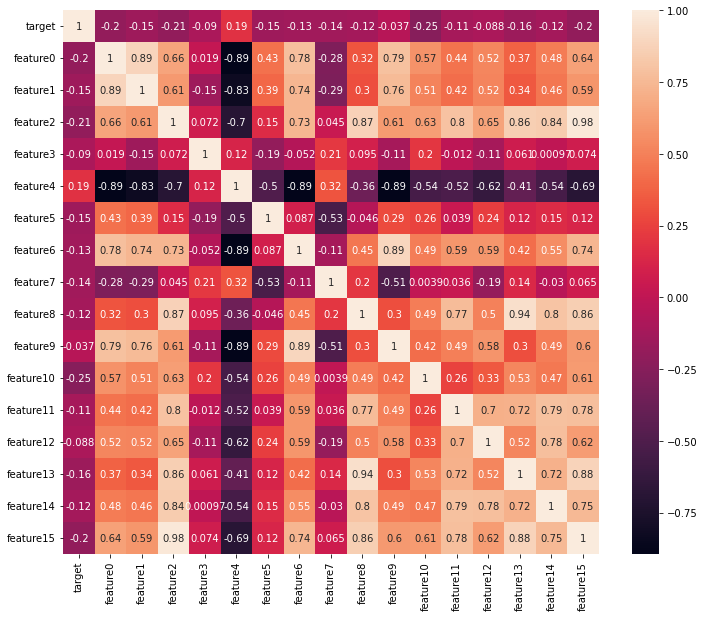

In [83]:
#spearman, kendall, pearson
df_corr = df[['target', 'feature0', 'feature1', 'feature2', 'feature3', 
              'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 
              'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15']].corr(method='spearman')
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr, annot=True)

**Considerações sobre a análise multivariada**

* Utilizando a correlação de Spearman, dá para perceber que a feature4 é a que aparentemente tem mais força no dataset;
* O atributo target não possui uma correlação forte com nenhum outro atributo, isso vai dificultar na construção do modelo;

<h2>CONTINUA NO PRÓXIMO NOTEBOOK</h2>

No próximo notebook preparacao.ipynb irei abordar técnicas de tratamento de outliers, seleção de features, construção e avaliação do modelo.